# Homework 3
## Jacob Traunero
Problem 1

a) See attached written sheet

b)


In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def fPrimeApprox(func, a, h):
  return ((func(a+h) - func(a))/h)

In [0]:
a = 0
hs=np.logspace(-1,-16,16)
actualMinusApproximate =[abs(np.e**h - fPrimeApprox((lambda x: np.e**x), a, h)) for h in hs]


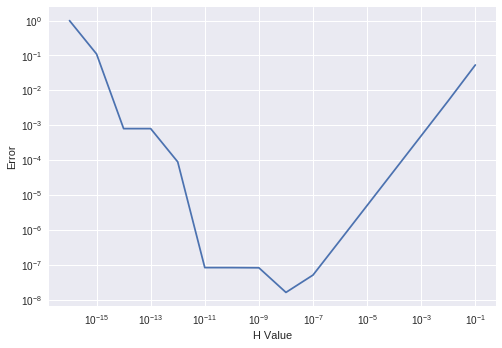

In [61]:
plt.loglog(hs,actualMinusApproximate)
plt.xlabel('H Value')
plt.ylabel('Error')
plt.show()

The minimum error occurs at an h value of 10^(-8) within the range of  [0,1]. 

c) See attached

d) See attached

e)

In [0]:

epsilon = np.finfo(float).eps
xs = [x for x in range(0,16)]

ys = [np.sqrt(epsilon) for x in range(0,16)]

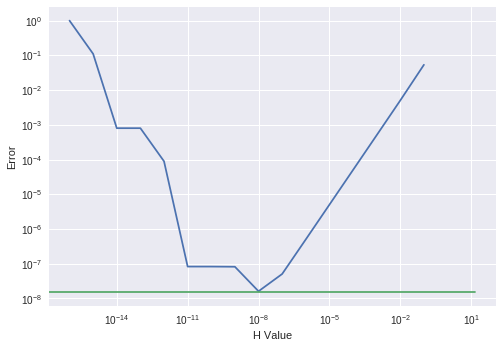

In [0]:
plt.loglog(hs,actualMinusApproximate)
plt.loglog(xs,ys)
plt.xlabel('H Value')
plt.ylabel('Error')
plt.show()

The graph is consistant with the information calculated previously.

Problem 2
a) See attached

b)

In [0]:
def fPrimeApprox2(func, a, h):
  return ((func(a+h) - func(a-h))/(2*h))

In [0]:
a = 0
hs=np.logspace(-1,-16,16)
actualMinusApproximate2 =[abs(np.e**h - fPrimeApprox2((lambda x: np.e**x), 0, h)) for h in hs]

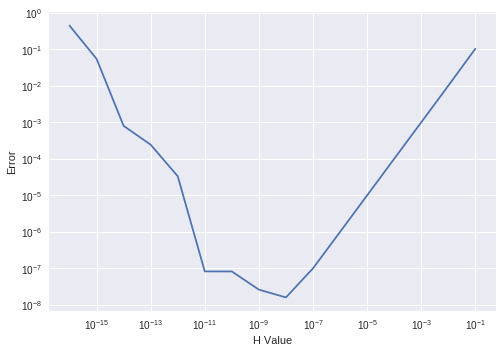

In [63]:
plt.loglog(hs,actualMinusApproximate2)
plt.xlabel('H Value')
plt.ylabel('Error')
plt.show()

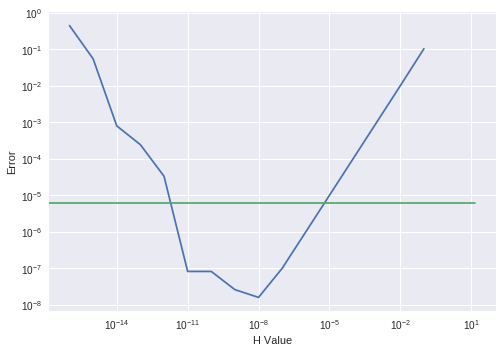

In [80]:
epsilon = np.finfo(float).eps
xs = [x for x in range(0,16)]

ys = [(epsilon)**(1/3) for x in range(0,16)]
plt.loglog(hs,actualMinusApproximate2)
plt.loglog(xs,ys)
plt.xlabel('H Value')
plt.ylabel('Error')
plt.show()

Stuck and getting unexpected results, so moving on to Problem 3.

Problem 3

In [0]:
def functionFromProblem3(x):
  return 1/(1+25*x**2)

In [0]:
def exactDeriv(x):
  return (-50*x)/((1+25*x**2)**2)

In [102]:
hs = [.5, .1, .05, .025, .0125]

centralDifferenceHs = [fPrimeApprox2(functionFromProblem3, .1, h) for h in hs]
print("H values using central difference approximation at x = .5 {}".format(centralDifferenceHs))

H values using central difference approximation at x = .5 [-0.09999999999999995, -2.5, -3.0117647058823525, -3.152224103432353, -3.188013815245414]


In [101]:
error = [abs(exactDeriv(h) - fPrimeApprox2(functionFromProblem3,.1, h)) for h in hs]
print("Errors: {}".format(error))

Errors: [0.37562425683709877, 0.7000000000000002, 0.7972318339100339, 1.9403897839057256, 2.567868165803333]


In [0]:
def findPk(h1,h2,e1,e2):
  return (np.log(e2/e1)/np.log(h2/h1))

In [0]:
pKValues = [findPk(centralDifferenceHs[i],centralDifferenceHs[i+1],error[i],error[i+1]) for i in range(0,4)]

In [128]:
print("pKValues: {}".format(pKValues))

pKValues: [0.19338770493007895, 0.6983910978136021, 19.514217565056214, 24.817669536188788]


c)

In [0]:
def richardsonFormula(func, a, h):
  return float(fPrimeApprox2(func,a, h/2)+ (1/3)*(fPrimeApprox2(func,a, h/2) - fPrimeApprox2(func,a, h)))

In [146]:
richardsonHs =[richardsonFormula(functionFromProblem3, .1, h) for h in hs]

print("H values using richardson appoximation at x = .1 {}".format(centralDifferenceHs))

H values using richardson appoximation at x = .1 [-0.09999999999999995, -2.5, -3.0117647058823525, -3.152224103432353, -3.188013815245414]


In [154]:
error = [abs(exactDeriv(h) - richardsonFormula(functionFromProblem3,.1, h)) for h in hs]
print("Errors: {}".format(error))
pKValues = [findPk(richardsonHs[i],richardsonHs[i+1],error[i],error[i+1]) for i in range(0,4)]
print("pKValues{}".format(pKValues))

Errors: [0.5412988200859783, 0.017647058823530237, 0.9845110306433678, 1.988109399656474, 2.5798508926746475]
pKValues[-3.000775086262608, 768.7757767585097, 2498.9382532122922, 15783.75252443775]
